In [3]:
using KomaMRI, Plots, Unitful

seq = read_seq("mpf_001_short.seq")

function simulate_slice_profile_x(
    seq::Sequence; x=range(-2.e-2, 2.e-2, 200), sim_params=Dict{String,Any}("Δt_rf" => 1e-6)
)
    sim_params["return_type"] = "state"
    sys = Scanner()
    obj = Phantom{Float64}(; x=Array(x), z=zeros(size(x)))
    mag = simulate(obj, seq, sys; sim_params)
    return mag
end

┌ Info: Loading sequence mpf_001_short.seq ...
└ @ KomaMRIFiles C:\Users\lucya\.julia\packages\KomaMRIFiles\Xc9Fh\src\Sequence\Pulseq.jl:339


simulate_slice_profile_x (generic function with 1 method)

In [ ]:
length(seq)
size(seq.RF)  # returns (n_rf_blocks_per_pulse, n_rf_pulses)

for i in 1:size(seq.RF, 2)
    if any(rf -> !iszero(rf.A), seq.RF[:, i])
        println("Nonzero RF at index $i")
    end
end

count(i -> any(rf -> !iszero(rf.A), seq.RF[:, i]), 1:size(seq.RF, 2))

Nonzero RF at index 2
Nonzero RF at index 3
Nonzero RF at index 5
Nonzero RF at index 7
Nonzero RF at index 9
Nonzero RF at index 11
Nonzero RF at index 13
Nonzero RF at index 15
Nonzero RF at index 17
Nonzero RF at index 19
Nonzero RF at index 21
Nonzero RF at index 23
Nonzero RF at index 25
Nonzero RF at index 27
Nonzero RF at index 29
Nonzero RF at index 31
Nonzero RF at index 33
Nonzero RF at index 35
Nonzero RF at index 37
Nonzero RF at index 39
Nonzero RF at index 41
Nonzero RF at index 43
Nonzero RF at index 45
Nonzero RF at index 47
Nonzero RF at index 49
Nonzero RF at index 51
Nonzero RF at index 53
Nonzero RF at index 55
Nonzero RF at index 57
Nonzero RF at index 59
Nonzero RF at index 61
Nonzero RF at index 63
Nonzero RF at index 65
Nonzero RF at index 67
Nonzero RF at index 69
Nonzero RF at index 71
Nonzero RF at index 73
Nonzero RF at index 75
Nonzero RF at index 77
Nonzero RF at index 79
Nonzero RF at index 81
Nonzero RF at index 83
Nonzero RF at index 85
Nonzero RF at in

962

In [14]:
begin

    fa_degrees = Float64[]
    rf_indices = Int[]

    # Define spatial domain (slice direction: x)
    x = -0.01:0.0001:0.01  # ±10 mm
    Δx = x[2] - x[1]
    slice_thickness = 5e-3  # in meters

    for i in 1:length(seq)
        rf_blocks = seq.RF[:, i]
        if all(rf -> iszero(rf.A), rf_blocks)
            continue  # skip if RF amplitude is zero
        end

        rf_event = seq[i]  # wrap the single SequenceEvent


        # Simulate slice profile along x
        M = simulate_slice_profile_x(rf_event; x=x)

        # Use M.xy directly (complex: Mx + iMy)
        Mxy = M.xy

        # # Integrate across x and compute magnitude
        integral_Mxy = sum(Mxy) * Δx
        magnitude_integral = abs(integral_Mxy)

        α_rad = asin(clamp(magnitude_integral / slice_thickness, -1.0, 1.0))
        α_deg = α_rad * 180 / π

        push!(fa_degrees, α_deg)
        push!(rf_indices, i)


        # # Print comparison
        # println("Bloch result (|∫ Mxy dx|): ", round(magnitude_integral, sigdigits=5))
        

        # actual_fa_rad = asin(clamp(magnitude_integral / slice_thickness, -1.0, 1.0))
        # actual_fa_deg = actual_fa_rad * 180 / π
        # println("Actual FA from Bloch: ", round(actual_fa_deg, digits=2), "°")

    end

end


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 6406
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
Running simulation...  50%|████████████████              |  ETA: 0:00:00


Running simulation...  95%|█████████████████████████████ |  ETA: 0:00:00


Running simulation... 100%|██████████████████████████████| Time: 0:00:00
   simulated_blocks: 22
          rf_blocks: 20
        acq_samples: 0


  0.220308 seconds (921.76 k allocations: 45.396 MiB)
  0.070479 seconds (151.52 k allocations: 7.620 MiB, 40.67% gc time)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.031690 seconds (151.51 k allocations: 7.620 MiB)
  0.031912 seconds (151.64 k allocations: 7.626 MiB)
  0.045818 seconds (151.64 k allocations: 7.626 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.029431 seconds (151.76 k allocations: 7.631 MiB)
  0.030700 seconds (151.76 k allocations: 7.631 MiB)
  0.034678 seconds (151.76 k allocations: 7.631 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.036526 seconds (151.76 k allocations: 7.631 MiB)
  0.029746 seconds (151.76 k allocations: 7.631 MiB)
  0.030912 seconds (151.76 k allocations: 7.631 MiB)
  0.030377 seconds (151.76 k allocations: 7.631 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\package

  0.030394 seconds (151.76 k allocations: 7.631 MiB)
  0.029555 seconds (151.76 k allocations: 7.631 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.047681 seconds (151.76 k allocations: 7.631 MiB, 18.33% gc time)
  0.030334 seconds (151.76 k allocations: 7.631 MiB)
  0.029644 seconds (151.88 k allocations: 7.637 MiB)
  0.029162 seconds (151.88 k allocations: 7.637 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\package

  0.041937 seconds (151.88 k allocations: 7.637 MiB)
  0.033069 seconds (151.88 k allocations: 7.637 MiB)
  0.034094 seconds (151.88 k allocations: 7.637 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.039575 seconds (151.88 k allocations: 7.637 MiB, 22.21% gc time)
  0.039310 seconds (151.88 k allocations: 7.637 MiB)
  0.029296 seconds (151.88 k allocations: 7.637 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.035713 seconds (151.88 k allocations: 7.637 MiB)
  0.041887 seconds (151.88 k allocations: 7.637 MiB)
  0.030677 seconds (151.88 k allocations: 7.637 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.041736 seconds (151.88 k allocations: 7.637 MiB)
  0.045241 seconds (151.88 k allocations: 7.637 MiB, 19.45% gc time)
  0.047455 seconds (151.88 k allocations: 7.637 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.034477 seconds (151.88 k allocations: 7.637 MiB)
  0.030197 seconds (151.88 k allocations: 7.637 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.046034 seconds (151.88 k allocations: 7.637 MiB)
  0.031844 seconds (151.88 k allocations: 7.637 MiB)
  0.033143 seconds (151.88 k allocations: 7.637 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.038955 seconds (151.88 k allocations: 7.637 MiB, 21.76% gc time)
  0.030993 seconds (151.88 k allocations: 7.637 MiB)
  0.030748 seconds (151.88 k allocations: 7.637 MiB)
  0.030203 seconds (151.88 k allocations: 7.637 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.046318 seconds (151.88 k allocations: 7.637 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.059533 seconds (151.88 k allocations: 7.637 MiB)
  0.070344 seconds (151.41 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.075324 seconds (151.41 k allocations: 7.599 MiB, 21.11% gc time)
  0.057810 seconds (151.41 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.045888 seconds (151.41 k allocations: 7.599 MiB)
  0.056595 seconds (151.41 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.051346 seconds (151.41 k allocations: 7.599 MiB)
  0.030730 seconds (151.42 k allocations: 7.599 MiB)
  0.033862 seconds (151.42 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.038882 seconds (151.41 k allocations: 7.599 MiB)
  0.029119 seconds (151.42 k allocations: 7.599 MiB)
  0.030835 seconds (151.42 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.040234 seconds (151.41 k allocations: 7.599 MiB)
  0.035338 seconds (151.42 k allocations: 7.599 MiB)
  0.046813 seconds (151.41 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.051902 seconds (151.42 k allocations: 7.599 MiB, 23.46% gc time)
  0.039256 seconds (151.41 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.065550 seconds (151.41 k allocations: 7.599 MiB)
  0.031496 seconds (151.41 k allocations: 7.599 MiB)
  0.030509 seconds (151.42 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.030099 seconds (151.42 k allocations: 7.599 MiB)
  0.031771 seconds (151.41 k allocations: 7.599 MiB)
  0.044366 seconds (151.42 k allocations: 7.599 MiB, 23.23% gc time)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.051036 seconds (151.41 k allocations: 7.599 MiB)
  0.038767 seconds (151.42 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.053335 seconds (151.42 k allocations: 7.599 MiB)
  0.045747 seconds (151.42 k allocations: 7.599 MiB)
  0.043547 seconds (151.41 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.032381 seconds (151.42 k allocations: 7.599 MiB)
  0.051030 seconds (151.42 k allocations: 7.599 MiB, 23.10% gc time)
  0.041093 seconds (151.41 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.032862 seconds (151.41 k allocations: 7.599 MiB)
  0.036935 seconds (151.41 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.028759 seconds (151.42 k allocations: 7.599 MiB)
  0.030749 seconds (151.42 k allocations: 7.599 MiB)
  0.031315 seconds (151.41 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.059741 seconds (151.42 k allocations: 7.599 MiB, 19.63% gc time)
  0.054075 seconds (151.42 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.051577 seconds (151.42 k allocations: 7.599 MiB)
  0.034080 seconds (151.42 k allocations: 7.599 MiB)
  0.049020 seconds (151.41 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.033382 seconds (151.41 k allocations: 7.599 MiB)
  0.045086 seconds (151.42 k allocations: 7.599 MiB)
  0.043962 seconds (151.41 k allocations: 7.599 MiB, 22.02% gc time)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.032871 seconds (151.41 k allocations: 7.599 MiB)
  0.078140 seconds (151.41 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.053282 seconds (151.41 k allocations: 7.599 MiB)
  0.032536 seconds (151.42 k allocations: 7.599 MiB)
  0.028758 seconds (151.42 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.033321 seconds (151.42 k allocations: 7.599 MiB)
  0.043695 seconds (151.42 k allocations: 7.599 MiB, 24.93% gc time)
  0.044509 seconds (151.42 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.038740 seconds (151.42 k allocations: 7.599 MiB)
  0.037453 seconds (151.42 k allocations: 7.599 MiB)
  0.037344 seconds (151.42 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.030923 seconds (151.42 k allocations: 7.599 MiB)
  0.033834 seconds (151.42 k allocations: 7.599 MiB)
  0.046818 seconds (151.41 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.042125 seconds (151.42 k allocations: 7.599 MiB)
  0.050167 seconds (151.41 k allocations: 7.599 MiB)
  0.037494 seconds (151.42 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.036020 seconds (151.42 k allocations: 7.599 MiB)
  0.040015 seconds (151.41 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.057683 seconds (151.41 k allocations: 7.599 MiB, 17.83% gc time)
  0.052806 seconds (151.42 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.050694 seconds (151.41 k allocations: 7.599 MiB)
  0.033765 seconds (151.42 k allocations: 7.599 MiB)
  0.029519 seconds (151.42 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.032334 seconds (151.41 k allocations: 7.599 MiB)
  0.031652 seconds (151.42 k allocations: 7.599 MiB)
  0.046897 seconds (151.42 k allocations: 7.599 MiB, 25.36% gc time)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.032784 seconds (151.41 k allocations: 7.599 MiB)
  0.032030 seconds (151.41 k allocations: 7.599 MiB)
  0.033683 seconds (151.41 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.044575 seconds (151.42 k allocations: 7.599 MiB)
  0.030193 seconds (151.41 k allocations: 7.599 MiB)
  0.029806 seconds (151.41 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.038522 seconds (151.41 k allocations: 7.599 MiB, 22.41% gc time)
  0.030634 seconds (151.42 k allocations: 7.599 MiB)
  0.038984 seconds (151.41 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.033073 seconds (151.42 k allocations: 7.599 MiB)
  0.037681 seconds (151.41 k allocations: 7.599 MiB)
  0.042066 seconds (151.41 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.037311 seconds (151.42 k allocations: 7.599 MiB)
  0.040478 seconds (151.42 k allocations: 7.599 MiB, 24.13% gc time)
  0.046638 seconds (151.42 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.056948 seconds (151.41 k allocations: 7.599 MiB)
  0.039081 seconds (151.41 k allocations: 7.599 MiB)
  0.040744 seconds (151.41 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.031287 seconds (151.42 k allocations: 7.599 MiB)
  0.033197 seconds (151.41 k allocations: 7.599 MiB)
  0.044615 seconds (151.42 k allocations: 7.599 MiB, 23.51% gc time)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.050720 seconds (151.42 k allocations: 7.599 MiB)
  0.069223 seconds (151.42 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.086467 seconds (151.41 k allocations: 7.599 MiB)
  0.030920 seconds (151.41 k allocations: 7.599 MiB)
  0.030835 seconds (151.42 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.031920 seconds (151.41 k allocations: 7.599 MiB)
  0.034593 seconds (151.42 k allocations: 7.599 MiB, 26.15% gc time)
  0.036589 seconds (151.41 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.025908 seconds (151.42 k allocations: 7.599 MiB)
  0.027994 seconds (151.42 k allocations: 7.599 MiB)
  0.026502 seconds (151.42 k allocations: 7.599 MiB)
  0.024966 seconds (151.41 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\package

  0.026849 seconds (151.41 k allocations: 7.599 MiB)
  0.031485 seconds (151.41 k allocations: 7.599 MiB)
  0.024798 seconds (151.42 k allocations: 7.599 MiB)
  0.024633 seconds (151.42 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\package

  0.023998 seconds (151.42 k allocations: 7.599 MiB)
  0.024346 seconds (151.41 k allocations: 7.599 MiB)
  0.024052 seconds (151.41 k allocations: 7.599 MiB)
  0.036436 seconds (151.42 k allocations: 7.599 MiB, 23.77% gc time)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\package

  0.029744 seconds (151.42 k allocations: 7.599 MiB)
  0.030264 seconds (151.42 k allocations: 7.599 MiB)
  0.042401 seconds (151.42 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.040287 seconds (151.42 k allocations: 7.599 MiB)
  0.038048 seconds (151.41 k allocations: 7.599 MiB)
  0.044767 seconds (151.42 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.050359 seconds (151.41 k allocations: 7.599 MiB, 17.49% gc time)
  0.032760 seconds (151.42 k allocations: 7.599 MiB)
  0.041164 seconds (151.88 k allocations: 7.637 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.030272 seconds (151.88 k allocations: 7.637 MiB)
  0.033762 seconds (151.88 k allocations: 7.637 MiB)
  0.033050 seconds (151.88 k allocations: 7.637 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.041051 seconds (151.88 k allocations: 7.637 MiB)
  0.041659 seconds (151.88 k allocations: 7.637 MiB, 22.88% gc time)
  0.037216 seconds (151.88 k allocations: 7.637 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.049357 seconds (151.88 k allocations: 7.637 MiB)
  0.057266 seconds (151.88 k allocations: 7.637 MiB)
  0.035531 seconds (151.88 k allocations: 7.637 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.043335 seconds (151.88 k allocations: 7.637 MiB)
  0.039588 seconds (151.88 k allocations: 7.637 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.061470 seconds (151.88 k allocations: 7.637 MiB, 21.26% gc time)
  0.052909 seconds (151.88 k allocations: 7.637 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.046136 seconds (151.88 k allocations: 7.637 MiB)
  0.049369 seconds (151.88 k allocations: 7.637 MiB)
  0.033499 seconds (151.88 k allocations: 7.637 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.029444 seconds (151.88 k allocations: 7.637 MiB)
  0.030529 seconds (151.88 k allocations: 7.637 MiB)
  0.048616 seconds (151.88 k allocations: 7.637 MiB, 21.69% gc time)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.032891 seconds (151.88 k allocations: 7.637 MiB)
  0.035227 seconds (151.88 k allocations: 7.637 MiB)
  0.035374 seconds (151.88 k allocations: 7.637 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.049027 seconds (151.88 k allocations: 7.637 MiB)
  0.067786 seconds (151.88 k allocations: 7.637 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.049433 seconds (151.76 k allocations: 7.631 MiB)
  0.046117 seconds (151.76 k allocations: 7.631 MiB, 24.56% gc time)
  0.035506 seconds (151.76 k allocations: 7.631 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.030665 seconds (151.76 k allocations: 7.631 MiB)
  0.029735 seconds (151.76 k allocations: 7.631 MiB)
  0.049104 seconds (151.76 k allocations: 7.631 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.037558 seconds (151.76 k allocations: 7.631 MiB)
  0.040201 seconds (151.76 k allocations: 7.631 MiB, 26.16% gc time)
  0.049141 seconds (151.76 k allocations: 7.631 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.053771 seconds (151.76 k allocations: 7.631 MiB)
  0.055482 seconds (151.76 k allocations: 7.631 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.076361 seconds (151.64 k allocations: 7.626 MiB)
  0.074966 seconds (151.63 k allocations: 7.626 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.059421 seconds (151.63 k allocations: 7.626 MiB)
  0.063448 seconds (151.63 k allocations: 7.626 MiB, 16.29% gc time)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.043412 seconds (151.51 k allocations: 7.620 MiB)
  0.045206 seconds (151.63 k allocations: 7.626 MiB)
  0.043309 seconds (151.63 k allocations: 7.626 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.046382 seconds (151.63 k allocations: 7.626 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.058876 seconds (151.76 k allocations: 7.631 MiB)
  0.030445 seconds (151.76 k allocations: 7.631 MiB)
  0.044929 seconds (151.76 k allocations: 7.631 MiB, 25.19% gc time)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.036787 seconds (151.76 k allocations: 7.631 MiB)
  0.056835 seconds (151.76 k allocations: 7.631 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.067466 seconds (151.76 k allocations: 7.631 MiB)
  0.046653 seconds (151.76 k allocations: 7.631 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.059961 seconds (151.76 k allocations: 7.631 MiB)
  0.059587 seconds (151.76 k allocations: 7.631 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.084725 seconds (151.88 k allocations: 7.637 MiB, 21.16% gc time)
  0.050563 seconds (151.88 k allocations: 7.637 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.045517 seconds (151.88 k allocations: 7.637 MiB)
  0.036905 seconds (151.88 k allocations: 7.637 MiB)
  0.033643 seconds (151.88 k allocations: 7.637 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.032651 seconds (151.88 k allocations: 7.637 MiB)
  0.036068 seconds (151.88 k allocations: 7.637 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.067687 seconds (151.88 k allocations: 7.637 MiB, 22.93% gc time)
  0.047669 seconds (151.88 k allocations: 7.637 MiB)
  0.035961 seconds (151.88 k allocations: 7.637 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.035094 seconds (151.88 k allocations: 7.637 MiB)
  0.046994 seconds (151.88 k allocations: 7.637 MiB)
  0.044727 seconds (151.88 k allocations: 7.637 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.033452 seconds (151.88 k allocations: 7.637 MiB)
  0.038207 seconds (151.88 k allocations: 7.637 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.039677 seconds (151.88 k allocations: 7.637 MiB)
  0.034383 seconds (151.88 k allocations: 7.637 MiB)
  0.040675 seconds (151.88 k allocations: 7.637 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.049274 seconds (151.88 k allocations: 7.637 MiB)
  0.035226 seconds (151.42 k allocations: 7.599 MiB)
  0.057752 seconds (151.42 k allocations: 7.599 MiB, 17.65% gc time)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.058434 seconds (151.42 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.060343 seconds (151.41 k allocations: 7.599 MiB)
  0.044108 seconds (151.41 k allocations: 7.599 MiB)
  0.033698 seconds (151.42 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.047982 seconds (151.41 k allocations: 7.599 MiB)
  0.032908 seconds (151.42 k allocations: 7.599 MiB)
  0.040405 seconds (151.41 k allocations: 7.599 MiB, 21.87% gc time)
  0.099680 seconds (151.42 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\package

  0.093755 seconds (151.41 k allocations: 7.599 MiB)
  0.095790 seconds (151.41 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.095743 seconds (151.42 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.093737 seconds (151.41 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.095720 seconds (151.42 k allocations: 7.599 MiB)
  0.107654 seconds (151.41 k allocations: 7.599 MiB, 15.66% gc time)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
Running simulation...  92%|████████████████████████████  |  ETA: 0:00:00


Running simulation... 100%|██████████████████████████████| Time: 0:00:00
   simulated_blocks: 24
          rf_blocks: 21
        acq_samples: 0


  0.205694 seconds (152.09 k allocations: 7.633 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
Running simulation...  54%|█████████████████             |  ETA: 0:00:00


Running simulation... 100%|██████████████████████████████| Time: 0:00:00
   simulated_blocks: 24
          rf_blocks: 21
        acq_samples: 0


  0.237843 seconds (152.12 k allocations: 7.635 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
Running simulation...  50%|████████████████              |  ETA: 0:00:00


Running simulation... 100%|██████████████████████████████| Time: 0:00:00
   simulated_blocks: 24
          rf_blocks: 21
        acq_samples: 0


  0.203370 seconds (152.07 k allocations: 7.633 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
Running simulation...  88%|███████████████████████████   |  ETA: 0:00:00


Running simulation... 100%|██████████████████████████████| Time: 0:00:00
   simulated_blocks: 24
          rf_blocks: 21
        acq_samples: 0


  0.119150 seconds (152.05 k allocations: 7.632 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.091138 seconds (151.41 k allocations: 7.599 MiB)
  0.090376 seconds (151.41 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
Running simulation...  96%|█████████████████████████████ |  ETA: 0:00:00


Running simulation... 100%|██████████████████████████████| Time: 0:00:00
   simulated_blocks: 24
          rf_blocks: 21
        acq_samples: 0


  0.106527 seconds (152.04 k allocations: 7.631 MiB, 12.60% gc time)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.096878 seconds (151.42 k allocations: 7.599 MiB)
  0.086863 seconds (151.41 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.090934 seconds (151.42 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.091412 seconds (151.41 k allocations: 7.599 MiB)
  0.088857 seconds (150.95 k allocations: 7.561 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.092419 seconds (150.95 k allocations: 7.561 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
Running simulation...  86%|██████████████████████████    |  ETA: 0:00:00


Running simulation... 100%|██████████████████████████████| Time: 0:00:00
   simulated_blocks: 22
          rf_blocks: 20
        acq_samples: 0


  0.122211 seconds (151.61 k allocations: 7.595 MiB, 12.91% gc time)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
Running simulation...  95%|█████████████████████████████ |  ETA: 0:00:00


Running simulation... 100%|██████████████████████████████| Time: 0:00:00
   simulated_blocks: 22
          rf_blocks: 20
        acq_samples: 0


  0.109631 seconds (151.62 k allocations: 7.596 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.096135 seconds (150.96 k allocations: 7.561 MiB)
  0.092028 seconds (150.95 k allocations: 7.561 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.094560 seconds (150.96 k allocations: 7.561 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.098992 seconds (150.97 k allocations: 7.561 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
Running simulation...  91%|████████████████████████████  |  ETA: 0:00:00


Running simulation... 100%|██████████████████████████████| Time: 0:00:00
   simulated_blocks: 22
          rf_blocks: 20
        acq_samples: 0


  0.110523 seconds (151.63 k allocations: 7.596 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
Running simulation...  95%|█████████████████████████████ |  ETA: 0:00:00


Running simulation... 100%|██████████████████████████████| Time: 0:00:00
   simulated_blocks: 22
          rf_blocks: 20
        acq_samples: 0


  0.108841 seconds (151.62 k allocations: 7.596 MiB, 13.42% gc time)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.090898 seconds (150.95 k allocations: 7.561 MiB)
  0.090211 seconds (150.95 k allocations: 7.561 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.088122 seconds (150.95 k allocations: 7.561 MiB)
  0.091881 seconds (150.95 k allocations: 7.561 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.089705 seconds (150.95 k allocations: 7.561 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.090381 seconds (150.95 k allocations: 7.561 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.093266 seconds (150.95 k allocations: 7.561 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.093382 seconds (150.95 k allocations: 7.561 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
Running simulation...  95%|█████████████████████████████ |  ETA: 0:00:00


Running simulation... 100%|██████████████████████████████| Time: 0:00:00
   simulated_blocks: 22
          rf_blocks: 20
        acq_samples: 0


  0.112375 seconds (151.67 k allocations: 7.597 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
Running simulation...  95%|█████████████████████████████ |  ETA: 0:00:00


Running simulation... 100%|██████████████████████████████| Time: 0:00:00
   simulated_blocks: 22
          rf_blocks: 20
        acq_samples: 0


  0.109727 seconds (151.61 k allocations: 7.596 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
Running simulation...  91%|████████████████████████████  |  ETA: 0:00:00


Running simulation... 100%|██████████████████████████████| Time: 0:00:00
   simulated_blocks: 22
          rf_blocks: 20
        acq_samples: 0


  0.115333 seconds (151.64 k allocations: 7.596 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.090455 seconds (150.95 k allocations: 7.561 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
Running simulation...  95%|█████████████████████████████ |  ETA: 0:00:00


Running simulation... 100%|██████████████████████████████| Time: 0:00:00
   simulated_blocks: 22
          rf_blocks: 20
        acq_samples: 0


  0.115798 seconds (151.61 k allocations: 7.596 MiB, 15.80% gc time)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.095311 seconds (150.96 k allocations: 7.561 MiB)
  0.087642 seconds (150.95 k allocations: 7.561 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.086477 seconds (150.95 k allocations: 7.561 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.089113 seconds (150.95 k allocations: 7.561 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.096873 seconds (150.96 k allocations: 7.561 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.097518 seconds (150.96 k allocations: 7.561 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
Running simulation...  86%|██████████████████████████    |  ETA: 0:00:00


Running simulation... 100%|██████████████████████████████| Time: 0:00:00
   simulated_blocks: 22
          rf_blocks: 20
        acq_samples: 0


  0.129485 seconds (151.64 k allocations: 7.597 MiB, 11.20% gc time)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.088986 seconds (150.95 k allocations: 7.561 MiB)
  0.092492 seconds (150.95 k allocations: 7.561 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.091199 seconds (150.95 k allocations: 7.561 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
Running simulation...  91%|████████████████████████████  |  ETA: 0:00:00


Running simulation... 100%|██████████████████████████████| Time: 0:00:00
   simulated_blocks: 22
          rf_blocks: 20
        acq_samples: 0


  0.116791 seconds (151.64 k allocations: 7.597 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.088812 seconds (150.95 k allocations: 7.561 MiB)
  0.086430 seconds (150.95 k allocations: 7.561 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
Running simulation...  95%|█████████████████████████████ |  ETA: 0:00:00


Running simulation... 100%|██████████████████████████████| Time: 0:00:00
   simulated_blocks: 22
          rf_blocks: 20
        acq_samples: 0


  0.111115 seconds (151.63 k allocations: 7.598 MiB, 12.30% gc time)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
Running simulation...  36%|███████████                   |  ETA: 0:00:00


Running simulation... 100%|██████████████████████████████| Time: 0:00:00
   simulated_blocks: 22
          rf_blocks: 20
        acq_samples: 0


  0.250650 seconds (151.61 k allocations: 7.595 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
Running simulation...  95%|█████████████████████████████ |  ETA: 0:00:00


Running simulation... 100%|██████████████████████████████| Time: 0:00:00
   simulated_blocks: 22
          rf_blocks: 20
        acq_samples: 0


  0.106529 seconds (151.63 k allocations: 7.596 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
Running simulation...  95%|█████████████████████████████ |  ETA: 0:00:00


Running simulation... 100%|██████████████████████████████| Time: 0:00:00
   simulated_blocks: 22
          rf_blocks: 20
        acq_samples: 0


  0.109485 seconds (151.63 k allocations: 7.596 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
Running simulation...  91%|████████████████████████████  |  ETA: 0:00:00


Running simulation... 100%|██████████████████████████████| Time: 0:00:00
   simulated_blocks: 22
          rf_blocks: 20
        acq_samples: 0


  0.112859 seconds (151.62 k allocations: 7.596 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.094009 seconds (150.95 k allocations: 7.561 MiB)
  0.091193 seconds (150.95 k allocations: 7.561 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
Running simulation...  95%|█████████████████████████████ |  ETA: 0:00:00


Running simulation... 100%|██████████████████████████████| Time: 0:00:00
   simulated_blocks: 22
          rf_blocks: 20
        acq_samples: 0


  0.107870 seconds (151.58 k allocations: 7.593 MiB, 13.55% gc time)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.090447 seconds (150.95 k allocations: 7.561 MiB)
  0.089946 seconds (150.95 k allocations: 7.561 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.089961 seconds (150.95 k allocations: 7.561 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.086914 seconds (150.95 k allocations: 7.561 MiB)
  0.084893 seconds (150.95 k allocations: 7.561 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.095926 seconds (150.96 k allocations: 7.561 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
Running simulation...  91%|████████████████████████████  |  ETA: 0:00:00


Running simulation... 100%|██████████████████████████████| Time: 0:00:00
   simulated_blocks: 22
          rf_blocks: 20
        acq_samples: 0


  0.113833 seconds (151.62 k allocations: 7.596 MiB, 12.39% gc time)
  0.094833 seconds (150.96 k allocations: 7.561 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.088344 seconds (150.95 k allocations: 7.561 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.089982 seconds (150.95 k allocations: 7.561 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.087614 seconds (150.95 k allocations: 7.561 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.092690 seconds (150.95 k allocations: 7.561 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
Running simulation...  95%|█████████████████████████████ |  ETA: 0:00:00


Running simulation... 100%|██████████████████████████████| Time: 0:00:00
   simulated_blocks: 22
          rf_blocks: 20
        acq_samples: 0


  0.117334 seconds (151.63 k allocations: 7.596 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
Running simulation...  91%|████████████████████████████  |  ETA: 0:00:00


Running simulation... 100%|██████████████████████████████| Time: 0:00:00
   simulated_blocks: 22
          rf_blocks: 20
        acq_samples: 0


  0.113315 seconds (151.64 k allocations: 7.597 MiB, 12.21% gc time)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.090245 seconds (150.95 k allocations: 7.561 MiB)
  0.089631 seconds (150.95 k allocations: 7.561 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.093179 seconds (150.95 k allocations: 7.561 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.087238 seconds (150.95 k allocations: 7.561 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.094318 seconds (150.95 k allocations: 7.561 MiB)
  0.089189 seconds (150.95 k allocations: 7.561 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
Running simulation...  95%|█████████████████████████████ |  ETA: 0:00:00


Running simulation... 100%|██████████████████████████████| Time: 0:00:00
   simulated_blocks: 22
          rf_blocks: 20
        acq_samples: 0


  0.108375 seconds (151.58 k allocations: 7.597 MiB, 13.31% gc time)
  0.094859 seconds (150.95 k allocations: 7.561 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.092357 seconds (150.95 k allocations: 7.561 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
Running simulation...  77%|████████████████████████      |  ETA: 0:00:00


Running simulation... 100%|██████████████████████████████| Time: 0:00:00
   simulated_blocks: 22
          rf_blocks: 20
        acq_samples: 0


  0.135979 seconds (151.60 k allocations: 7.593 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
Running simulation...  91%|████████████████████████████  |  ETA: 0:00:00


Running simulation... 100%|██████████████████████████████| Time: 0:00:00
   simulated_blocks: 22
          rf_blocks: 20
        acq_samples: 0


  0.115946 seconds (151.63 k allocations: 7.596 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
Running simulation...  91%|████████████████████████████  |  ETA: 0:00:00


Running simulation... 100%|██████████████████████████████| Time: 0:00:00
   simulated_blocks: 22
          rf_blocks: 20
        acq_samples: 0


  0.117537 seconds (151.63 k allocations: 7.596 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
Running simulation...  86%|██████████████████████████    |  ETA: 0:00:00


Running simulation... 100%|██████████████████████████████| Time: 0:00:00
   simulated_blocks: 22
          rf_blocks: 20
        acq_samples: 0


  0.131067 seconds (151.63 k allocations: 7.596 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
Running simulation...  68%|█████████████████████         |  ETA: 0:00:00


Running simulation... 100%|██████████████████████████████| Time: 0:00:00
   simulated_blocks: 22
          rf_blocks: 20
        acq_samples: 0


  0.146198 seconds (151.64 k allocations: 7.596 MiB, 13.11% gc time)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
Running simulation...  82%|█████████████████████████     |  ETA: 0:00:00


Running simulation... 100%|██████████████████████████████| Time: 0:00:00
   simulated_blocks: 22
          rf_blocks: 20
        acq_samples: 0


  0.142225 seconds (151.63 k allocations: 7.596 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
Running simulation...  82%|█████████████████████████     |  ETA: 0:00:00


Running simulation... 100%|██████████████████████████████| Time: 0:00:00
   simulated_blocks: 22
          rf_blocks: 20
        acq_samples: 0


  0.136667 seconds (151.63 k allocations: 7.596 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
Running simulation...  86%|██████████████████████████    |  ETA: 0:00:00


Running simulation... 100%|██████████████████████████████| Time: 0:00:00
   simulated_blocks: 22
          rf_blocks: 20
        acq_samples: 0


  0.141938 seconds (151.62 k allocations: 7.596 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
Running simulation...  86%|██████████████████████████    |  ETA: 0:00:00


Running simulation... 100%|██████████████████████████████| Time: 0:00:00
   simulated_blocks: 22
          rf_blocks: 20
        acq_samples: 0


  0.134345 seconds (151.61 k allocations: 7.596 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
Running simulation...  91%|████████████████████████████  |  ETA: 0:00:00


Running simulation... 100%|██████████████████████████████| Time: 0:00:00
   simulated_blocks: 22
          rf_blocks: 20
        acq_samples: 0


  0.131812 seconds (151.62 k allocations: 7.596 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.099768 seconds (150.97 k allocations: 7.561 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
Running simulation...  91%|████████████████████████████  |  ETA: 0:00:00


Running simulation... 100%|██████████████████████████████| Time: 0:00:00
   simulated_blocks: 22
          rf_blocks: 20
        acq_samples: 0


  0.113549 seconds (151.63 k allocations: 7.596 MiB, 12.90% gc time)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.091358 seconds (150.95 k allocations: 7.561 MiB)
  0.085542 seconds (150.95 k allocations: 7.561 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.089202 seconds (150.95 k allocations: 7.561 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.093332 seconds (150.95 k allocations: 7.561 MiB)
  0.090872 seconds (151.41 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.098966 seconds (151.42 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
Running simulation...  96%|█████████████████████████████ |  ETA: 0:00:00


Running simulation... 100%|██████████████████████████████| Time: 0:00:00
   simulated_blocks: 24
          rf_blocks: 21
        acq_samples: 0


  0.110332 seconds (152.09 k allocations: 7.633 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
Running simulation...  96%|█████████████████████████████ |  ETA: 0:00:00


Running simulation... 100%|██████████████████████████████| Time: 0:00:00
   simulated_blocks: 24
          rf_blocks: 21
        acq_samples: 0


  0.107403 seconds (152.08 k allocations: 7.634 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
Running simulation...  96%|█████████████████████████████ |  ETA: 0:00:00


Running simulation... 100%|██████████████████████████████| Time: 0:00:00
   simulated_blocks: 24
          rf_blocks: 21
        acq_samples: 0


  0.108789 seconds (152.07 k allocations: 7.633 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.092707 seconds (151.41 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
Running simulation...  46%|██████████████                |  ETA: 0:00:00


Running simulation... 100%|██████████████████████████████| Time: 0:00:00
   simulated_blocks: 24
          rf_blocks: 21
        acq_samples: 0


  0.258844 seconds (152.07 k allocations: 7.633 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.096493 seconds (151.42 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.104253 seconds (151.41 k allocations: 7.599 MiB, 14.48% gc time)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.096377 seconds (151.42 k allocations: 7.599 MiB)
  0.092421 seconds (151.42 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.088098 seconds (151.41 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.090667 seconds (151.42 k allocations: 7.599 MiB)
  0.091727 seconds (151.42 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.093668 seconds (151.42 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
Running simulation...  96%|█████████████████████████████ |  ETA: 0:00:00


Running simulation... 100%|██████████████████████████████| Time: 0:00:00
   simulated_blocks: 24
          rf_blocks: 21
        acq_samples: 0


  0.115784 seconds (152.03 k allocations: 7.631 MiB, 13.92% gc time)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.091838 seconds (151.42 k allocations: 7.599 MiB)
  0.095155 seconds (151.42 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
Running simulation...  96%|█████████████████████████████ |  ETA: 0:00:00


Running simulation... 100%|██████████████████████████████| Time: 0:00:00
   simulated_blocks: 24
          rf_blocks: 21
        acq_samples: 0


  0.110716 seconds (152.05 k allocations: 7.632 MiB)
  0.095087 seconds (151.42 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.087801 seconds (151.41 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.092856 seconds (151.41 k allocations: 7.599 MiB)
  0.105581 seconds (151.41 k allocations: 7.599 MiB, 13.37% gc time)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.085466 seconds (151.41 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.090611 seconds (151.41 k allocations: 7.599 MiB)
  0.089566 seconds (151.41 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.089046 seconds (151.41 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.090688 seconds (151.88 k allocations: 7.637 MiB)
  0.089845 seconds (151.88 k allocations: 7.637 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.101424 seconds (151.88 k allocations: 7.637 MiB, 14.33% gc time)
  0.093200 seconds (151.88 k allocations: 7.637 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
Running simulation...  81%|█████████████████████████     |  ETA: 0:00:00


Running simulation... 100%|██████████████████████████████| Time: 0:00:00
   simulated_blocks: 26
          rf_blocks: 22
        acq_samples: 0


  0.143303 seconds (152.53 k allocations: 7.670 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.099725 seconds (151.89 k allocations: 7.637 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.095094 seconds (151.89 k allocations: 7.637 MiB)
  0.090689 seconds (151.88 k allocations: 7.637 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.088088 seconds (151.88 k allocations: 7.637 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
Running simulation...  92%|████████████████████████████  |  ETA: 0:00:00


Running simulation... 100%|██████████████████████████████| Time: 0:00:00
   simulated_blocks: 26
          rf_blocks: 22
        acq_samples: 0


  0.111775 seconds (152.54 k allocations: 7.673 MiB, 13.08% gc time)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
Running simulation...  96%|█████████████████████████████ |  ETA: 0:00:00


Running simulation... 100%|██████████████████████████████| Time: 0:00:00
   simulated_blocks: 26
          rf_blocks: 22
        acq_samples: 0


  0.112743 seconds (152.56 k allocations: 7.672 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
Running simulation...  77%|████████████████████████      |  ETA: 0:00:00


Running simulation... 100%|██████████████████████████████| Time: 0:00:00
   simulated_blocks: 26
          rf_blocks: 22
        acq_samples: 0


  0.137095 seconds (152.54 k allocations: 7.671 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
Running simulation...  65%|████████████████████          |  ETA: 0:00:00


Running simulation... 100%|██████████████████████████████| Time: 0:00:00
   simulated_blocks: 26
          rf_blocks: 22
        acq_samples: 0


  0.181811 seconds (152.55 k allocations: 7.671 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.099030 seconds (151.89 k allocations: 7.637 MiB)
  0.085979 seconds (151.88 k allocations: 7.637 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.088618 seconds (151.88 k allocations: 7.637 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.098859 seconds (151.90 k allocations: 7.638 MiB, 15.26% gc time)
  0.084710 seconds (151.88 k allocations: 7.637 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.087110 seconds (151.88 k allocations: 7.637 MiB)
  0.086538 seconds (151.76 k allocations: 7.631 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.088195 seconds (151.76 k allocations: 7.631 MiB)
  0.087480 seconds (151.76 k allocations: 7.631 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.092359 seconds (151.76 k allocations: 7.631 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.088413 seconds (151.76 k allocations: 7.631 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.092146 seconds (151.76 k allocations: 7.631 MiB)
  0.090956 seconds (151.76 k allocations: 7.631 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.089206 seconds (151.76 k allocations: 7.631 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.090089 seconds (151.76 k allocations: 7.631 MiB)
  0.088674 seconds (151.63 k allocations: 7.626 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.109433 seconds (151.63 k allocations: 7.626 MiB, 14.26% gc time)
  0.091605 seconds (151.63 k allocations: 7.626 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.085633 seconds (151.51 k allocations: 7.620 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.095849 seconds (151.64 k allocations: 7.626 MiB)
  0.088080 seconds (151.63 k allocations: 7.626 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.086507 seconds (151.76 k allocations: 7.631 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.088783 seconds (151.76 k allocations: 7.631 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.099365 seconds (151.76 k allocations: 7.631 MiB, 13.13% gc time)
  0.089950 seconds (151.76 k allocations: 7.631 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.084353 seconds (151.76 k allocations: 7.631 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
Running simulation...  42%|█████████████                 |  ETA: 0:00:00


Running simulation... 100%|██████████████████████████████| Time: 0:00:00
   simulated_blocks: 26
          rf_blocks: 22
        acq_samples: 0


  0.234859 seconds (152.56 k allocations: 7.672 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.089405 seconds (151.88 k allocations: 7.637 MiB)
  0.086474 seconds (151.88 k allocations: 7.637 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.086615 seconds (151.88 k allocations: 7.637 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.104700 seconds (151.88 k allocations: 7.637 MiB, 13.91% gc time)
  0.084868 seconds (151.88 k allocations: 7.637 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.088203 seconds (151.88 k allocations: 7.637 MiB)
  0.089161 seconds (151.88 k allocations: 7.637 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.091084 seconds (151.88 k allocations: 7.637 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.089064 seconds (151.88 k allocations: 7.637 MiB)
  0.090403 seconds (151.41 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
Running simulation...  92%|████████████████████████████  |  ETA: 0:00:00


Running simulation... 100%|██████████████████████████████| Time: 0:00:00
   simulated_blocks: 24
          rf_blocks: 21
        acq_samples: 0


  0.124268 seconds (152.08 k allocations: 7.632 MiB, 11.65% gc time)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.092928 seconds (151.42 k allocations: 7.599 MiB)
  0.083916 seconds (151.41 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.089749 seconds (151.42 k allocations: 7.599 MiB)
  0.088300 seconds (151.41 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.086714 seconds (151.41 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.087035 seconds (151.42 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
Running simulation...  92%|████████████████████████████  |  ETA: 0:00:00


Running simulation... 100%|██████████████████████████████| Time: 0:00:00
   simulated_blocks: 24
          rf_blocks: 21
        acq_samples: 0


  0.109393 seconds (152.09 k allocations: 7.634 MiB, 13.63% gc time)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.089959 seconds (151.41 k allocations: 7.599 MiB)
  0.088401 seconds (151.41 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.097263 seconds (151.43 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.094030 seconds (151.42 k allocations: 7.599 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.089056 seconds (150.95 k allocations: 7.561 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.086502 seconds (150.95 k allocations: 7.561 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
Running simulation...  91%|████████████████████████████  |  ETA: 0:00:00


Running simulation... 100%|██████████████████████████████| Time: 0:00:00
   simulated_blocks: 22
          rf_blocks: 20
        acq_samples: 0


  0.109883 seconds (151.63 k allocations: 7.597 MiB, 12.43% gc time)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
Excessive output truncated after 524386 bytes.

In [6]:
# FIRST 10


begin

    fa_degrees = Float64[]
    rf_indices = Int[]
    max_fas = 10  # only process first 10 RF pulses
    seen = 0

    x = -0.01:0.0001:0.01
    Δx = x[2] - x[1]
    slice_thickness = 10e-3

    for i in 1:length(seq)
        if seen >= max_fas
            break
        end

        rf_blocks = seq.RF[:, i]
        if all(rf -> iszero(rf.A), rf_blocks)
            continue
        end

        rf_event = seq[i]

        M = simulate_slice_profile_x(rf_event; x=x)
        Mxy = M.xy

        integral_Mxy = sum(Mxy) * Δx
        magnitude_integral = abs(integral_Mxy)

        α_rad = asin(clamp(magnitude_integral / slice_thickness, -1.0, 1.0))
        α_deg = α_rad * 180 / π

        push!(fa_degrees, α_deg)
        push!(rf_indices, i)

        seen += 1
    end

end


┌ Info:  
│   The GPU functionality is being called but no GPU backend is loaded 
│   to access it. Add 'using CUDA / Metal / AMDGPU / oneAPI' to your 
│   code. Defaulting back to the CPU. (No action is required if you want
│   to run on the CPU).
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\GPUFunctions.jl:46
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 6406
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
Running simulation...   9%|███                           |  ETA: 0:01:02


Running simulation... 100%|██████████████████████████████| Time: 0:00:06
   simulated_blocks: 22
          rf_blocks: 20
        acq_samples: 0


  7.369719 seconds (14.81 M allocations: 759.908 MiB, 2.85% gc time, 97.61% compilation time: 1% of which was recompilation)
  0.024687 seconds (151.51 k allocations: 7.620 MiB)
  0.035399 seconds (151.51 k allocations: 7.620 MiB)
  0.030668 seconds (151.63 k allocations: 7.626 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\package

  0.023702 seconds (151.63 k allocations: 7.626 MiB)
  0.044607 seconds (151.76 k allocations: 7.631 MiB, 44.63% gc time)
  0.023891 seconds (151.76 k allocations: 7.631 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


  0.024766 seconds (151.76 k allocations: 7.631 MiB)
  0.025282 seconds (151.76 k allocations: 7.631 MiB)
  0.030616 seconds (151.76 k allocations: 7.631 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.9.1
│   sim_method = Bloch()
│   spins = 201
│   time_points = 1022
│   adc_points = 0
└ @ KomaMRICore C:\Users\lucya\.julia\packages\KomaMRICore\DEJdd\src\simulation\SimulatorCore.jl:385


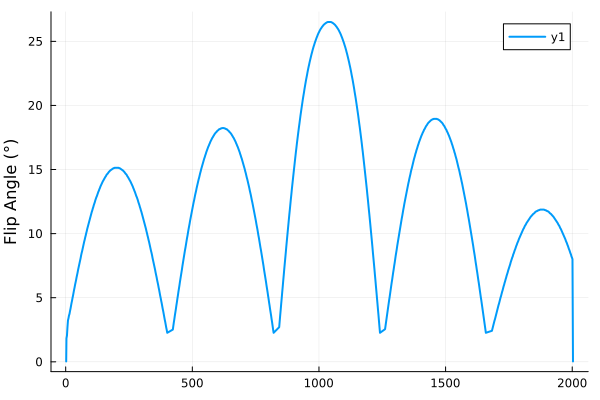

In [11]:
plot(rf_indices, fa_degrees,
    #xlabel="Event Index",
    ylabel="Flip Angle (°)",
    #title="Flip Angles from Nonzero RF Events",
    lw=2)

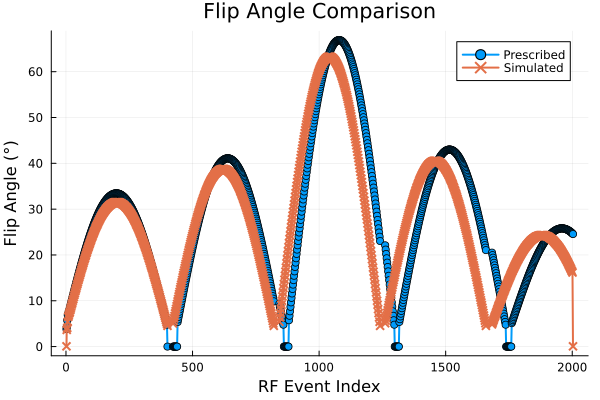

In [15]:
using MAT, Plots

# Load prescribed flip angles (°) from .mat file
matfile = matopen("FApattern.mat")
prescribed_fas = vec(read(matfile, "FA"))
close(matfile)

# Assume you simulated the first N flip angles (in order)
N = length(fa_degrees)

# Plot: x-axis = rf_indices, y-axis = values
plot(rf_indices, prescribed_fas[1:N],
     label="Prescribed", marker=:circle, lw=2)
plot!(rf_indices, fa_degrees,
      label="Simulated", marker=:x, lw=2)
xlabel!("RF Event Index")
ylabel!("Flip Angle (°)")
title!("Flip Angle Comparison")

